In [ ]:
#Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Load preferences data
pref = pd.read_csv("preferencesData.csv")
pref.head()

,Unnamed: 0,College Education,Household Size > 2,Daily Commute < 5 Miles,Type,Fuel,Price,Speed,Pollution,Size
0,0,N,N,N,van,compressed natural gas,4.175345,95,0.60,mid-size/large
1,1,Y,Y,Y,van,methanol,3.310947,85,0.00,mid-size/large
2,2,N,Y,N,regular car,gasoline,3.282154,95,0.75,mid-size/large
3,3,N,N,Y,regular car,electric,5.460066,95,0.60,mid-size/large
4,4,N,Y,N,regular car,gasoline,4.690508,110,0.75,mid-size/large


####Note
Some of the features like price and pollution have no units given and to better understand what these features are, you can look at their descriptions in the variableDescriptions.txt file located in the primary folder for this project.

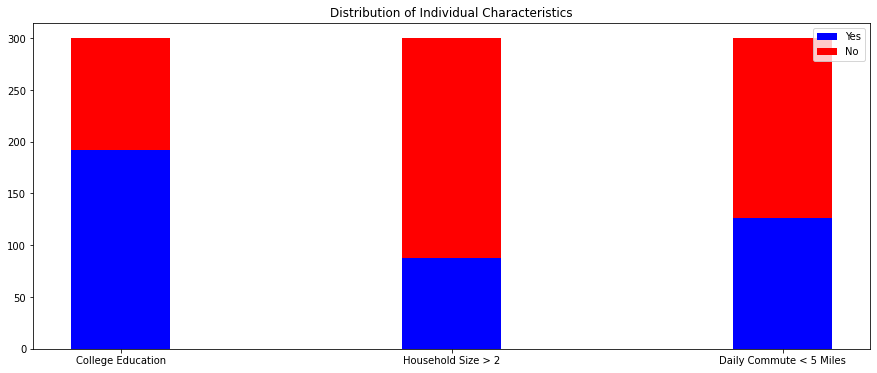



College Education:
192 Y: 64.0%
108 N: 36.0%


Household Size > 2:
88 Y: 29.333333333333332%
212 N: 70.66666666666667%


Daily Commute < 5 Miles:
126 Y: 42.0%
174 N: 58.0%

There are a total of 300 observations.



In [ ]:
#User attributes lists
edList, houseList, commuteList = list(pref["College Education"]), list(pref["Household Size > 2"]), list(pref["Daily Commute < 5 Miles"])

#Category names and Attribute distribution lists
categoryList = ["College Education", "Household Size > 2", "Daily Commute < 5 Miles"]
yesList, noList = [edList.count("Y"), houseList.count("Y"), commuteList.count("Y")], [edList.count("N"), houseList.count("N"), commuteList.count("N")]


#Configuring the figure
width = 0.3
plt.rcParams["figure.figsize"] = (15, 6)

#Plotting the distribution of each invidivual attribute
plt.title("Distribution of Individual Characteristics")
plt.bar(categoryList, yesList, width, color = "b")
plt.bar(categoryList, noList, width, bottom = yesList, color = "r")
plt.legend(labels = ["Yes", "No"])
plt.show()

#Printing the numerical values for the distributions
for i in range(3):
  print("\n\n" + categoryList[i] + ":")
  print(str(yesList[i]) + " Y: " + str(yesList[i] / 3) + "%")
  print(str(noList[i]) + " N: " + str(noList[i] / 3) + "%")

print("\nThere are a total of 300 observations.\n")

###Important Note
The source for this dataset is mentioned in the PreferencesData.ipynb located in the primary folder for this project. The source mentioned on the kaggle dataset I got this data from is this research paper -

http://pages.stern.nyu.edu/~wgreene/DiscreteChoice/Readings/McFadden-Train.pdf<br /><br />

This research paper (above) further points the source of the data to this paper - 

https://www.researchgate.net/publication/236452954_A_personal_vehicle_transactions_choice_model_for_use_in_forecasting_demand_for_future_alternative-fuel_vehicles
<br /><br />

This research paper (above) describes a survey being taken of approximately 4600 randomly selected people from mostly urbanized areas of California for the purpose of analyzing demand for alternative vehicles in order to more efficiently meet quotas set by California's government. While I am not completely sure of the exact locations of surveying or how the 4600 respondents' data got reduced to the 300 observations of the Kaggle Dataset which is also found all over the web on separate websites, the results from this dataset can be applied appropriately to different contexts as long as its general source is kept in mind.
<br /><br />
As can be seen in the bar charts above, the data does seem to come from a more urbanized area with more college graduates, smaller household sizes, and longer commutes. Keeping this in mind, we can apply these results to any user by shifting the numerical values obtained by some arbitrary margin of error or scaling factor.


In [ ]:
#Function to plot pie charts of the distribution of certain attributes given that another attribute is true
def interCharPie(mainCol, subCol1, subCol2, yNum, nNum, labels, yTitle, nTitle):
  #Attribute is True
  yesPercents = [len(pref.loc[(pref[mainCol] == "Y") & (pref[subCol1] == "Y")]) / yNum,
              len(pref.loc[(pref[mainCol] == "Y") & (pref[subCol1] == "N")]) / yNum,
              len(pref.loc[(pref[mainCol] == "Y") & (pref[subCol2] == "Y")]) / yNum,
              len(pref.loc[(pref[mainCol] == "Y") & (pref[subCol2] == "N")]) / yNum]

  #Attribute is False
  noPercents = [len(pref.loc[(pref[mainCol] == "N") & (pref[subCol1] == "Y")]) / nNum,
              len(pref.loc[(pref[mainCol] == "N") & (pref[subCol1] == "N")]) / nNum,
              len(pref.loc[(pref[mainCol] == "N") & (pref[subCol2] == "Y")]) / nNum,
              len(pref.loc[(pref[mainCol] == "N") & (pref[subCol2] == "N")]) / nNum]


  #Configuring the figure
  plt.rcParams["figure.figsize"] = (16, 14)

  #Plots all distributions
  count = 1
  for i in range(2):
    for j in range(2):
      plt.subplot(220 + count)
      plt.title([yTitle, nTitle][i])
      if j == 0:
        plt.pie([yesPercents, noPercents][i][0 : 2], labels = labels[0 : 2], autopct = "%1.1f%%")
      else:
        plt.pie([yesPercents, noPercents][i][2:], labels = labels[2:], autopct = "%1.1f%%")
      count += 1

  plt.show()

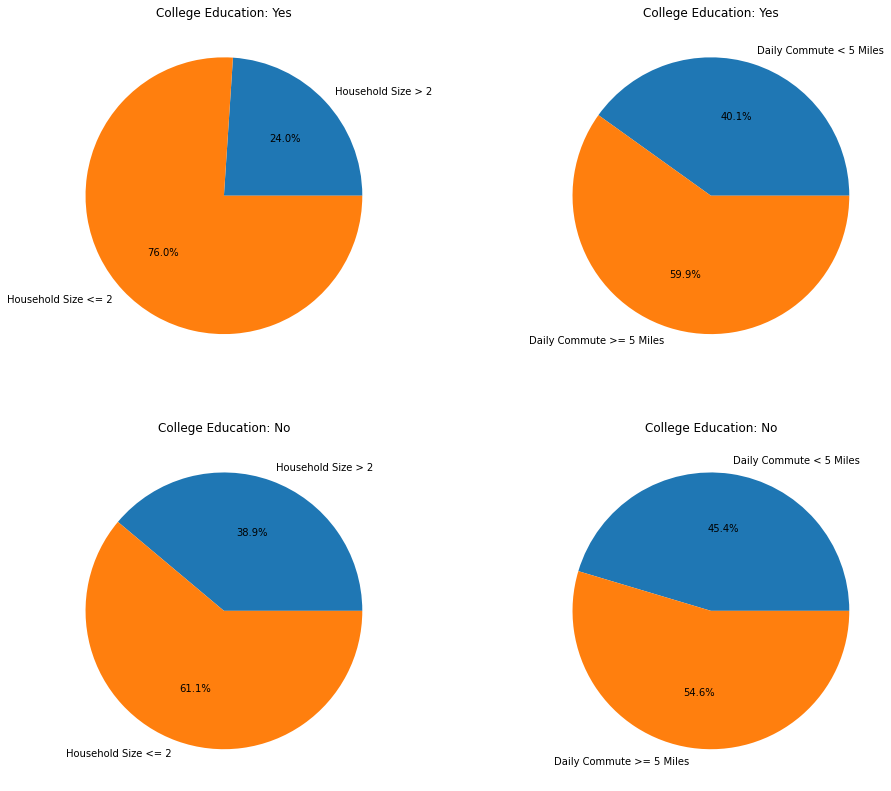

In [ ]:
#Plots the distribution of other attributes given the college education attribute
interCharPie("College Education", "Household Size > 2", "Daily Commute < 5 Miles", 1.92, 1.08,
        ["Household Size > 2", "Household Size <= 2", "Daily Commute < 5 Miles", "Daily Commute >= 5 Miles"],
        "College Education: Yes", "College Education: No")

###Summary
1. The proportion of college graduates that have small household sizes is higher than that of those without a college education.
2. The proportion of college graduates that have long daily commutes is higher than that of those without a college education.

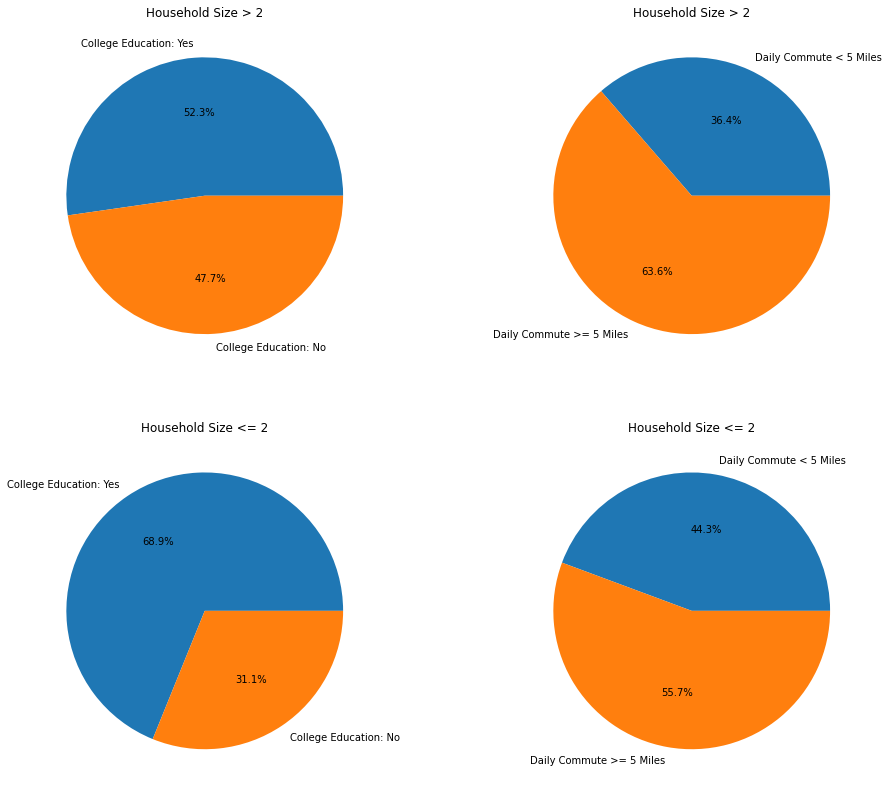

In [ ]:
#Plots the distribution of other attributes given the household size > 2 attribute
interCharPie("Household Size > 2", "College Education", "Daily Commute < 5 Miles", 0.88, 2.12,
        ["College Education: Yes", "College Education: No", "Daily Commute < 5 Miles", "Daily Commute >= 5 Miles"],
        "Household Size > 2", "Household Size <= 2")

###Summary
1. The proportion of people with large household sizes that are college educated is lower than that of those with small household sizes.
2. The proportion of people with large household sizes that have long daily commutes is higher than that of those with small household sizes.

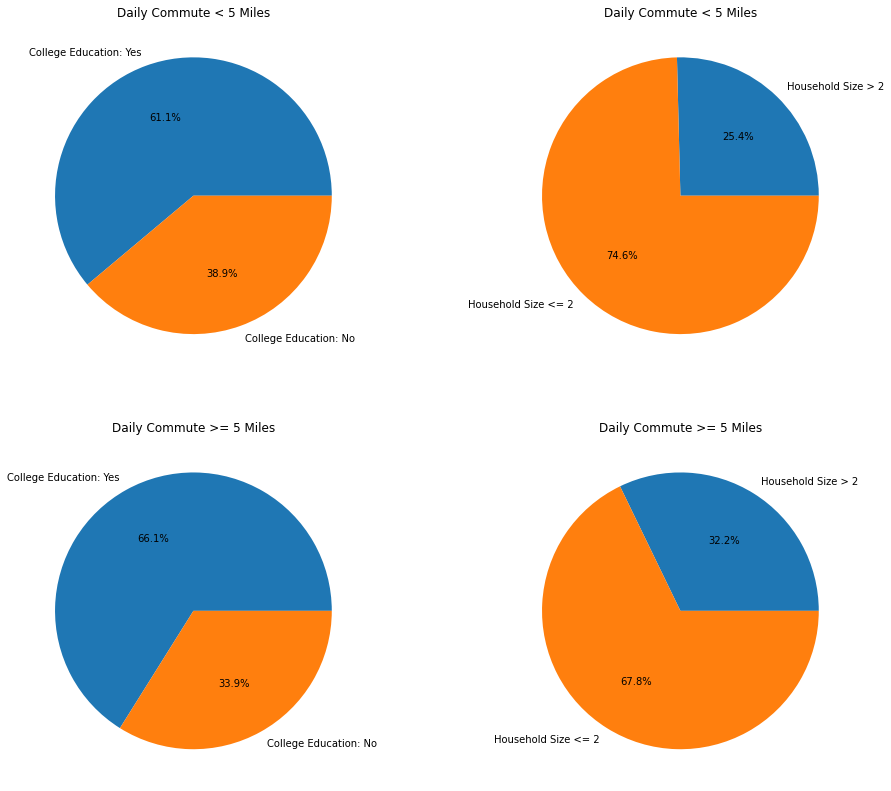

In [ ]:
#Plots the distribution of other attributes given the daily commute < 5 miles attribute
interCharPie("Daily Commute < 5 Miles", "College Education", "Household Size > 2", 1.26, 1.74,
        ["College Education: Yes", "College Education: No", "Household Size > 2", "Household Size <= 2"],
        "Daily Commute < 5 Miles", "Daily Commute >= 5 Miles")

###Summary
1. The proportion of people with long daily commutes that are college educated is higher than that of those with short daily commutes.
2. The proportion of people with long daily commutes that have large household sizes is higher than that of those with short daily commutes.

In [ ]:
#Unique categories for each qualitative car feature
typeSet, fuelSet, sizeSet = list(set(pref["Type"])), list(set(pref["Fuel"])), list(set(pref["Size"]))

#Function to plot the pie charts for distributions of qualitative car features given a certain user attribute
def charFeatPie(mainCol, yNum, nNum, yTitle, nTitle):

  yesPercents, noPercents = [], []

  #Adds percentages of each type of car for two groups: given user attribute is True & given user attribute is False
  for i in range(len(typeSet)):
    yesPercents.append(len(pref.loc[(pref[mainCol] == "Y") & (pref["Type"] == typeSet[i])]) / yNum)
    noPercents.append(len(pref.loc[(pref[mainCol] == "N") & (pref["Type"] == typeSet[i])]) / nNum)


  #Adds percentages of each fuel type for two groups: given user attribute is True & given user attribute is False
  for j in range(len(fuelSet)):
    yesPercents.append(len(pref.loc[(pref[mainCol] == "Y") & (pref["Fuel"] == fuelSet[j])]) / yNum)
    noPercents.append(len(pref.loc[(pref[mainCol] == "N") & (pref["Fuel"] == fuelSet[j])]) / nNum)

  #Adds percentages of each car size for two groups: given user attribute is True & given user attribute is False
  for k in range(len(sizeSet)):
    yesPercents.append(len(pref.loc[(pref[mainCol] == "Y") & (pref["Size"] == sizeSet[k])]) / yNum)
    noPercents.append(len(pref.loc[(pref[mainCol] == "N") & (pref["Size"] == sizeSet[k])]) / nNum)


  #Configures the figure 
  plt.rcParams["figure.figsize"] = (16, 21)

  #Plots all the feature distributions for both when the given attribute is true and false
  count = 1
  for a in range(3):
    for b in range(2):
      plt.subplot(320 + count)
      plt.title([yTitle, nTitle][b])
      if a == 0:
        plt.pie([yesPercents, noPercents][b][0 : len(typeSet)], labels = typeSet, autopct = "%1.1f%%")
      if a == 1:
        plt.pie([yesPercents, noPercents][b][len(typeSet) : len(typeSet) + len(fuelSet)], labels = fuelSet, autopct = "%1.1f%%")
      if a == 2:
        plt.pie([yesPercents, noPercents][b][(len(typeSet) + len(fuelSet)):], labels = sizeSet, autopct = "%1.1f%%")
      count += 1

  plt.show()

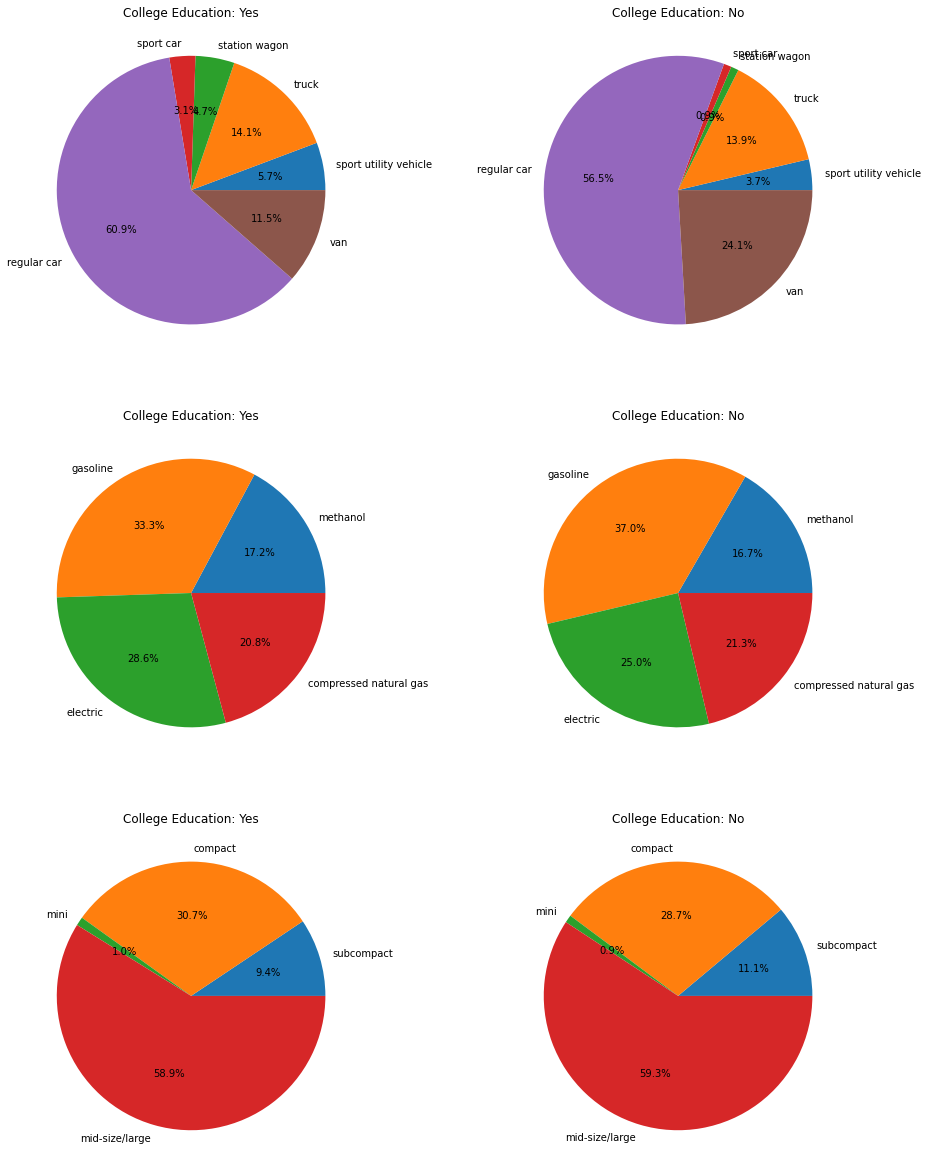

In [ ]:
#Plot the distributions of car features for the college education attribute
charFeatPie("College Education", 1.92, 1.08, "College Education: Yes", "College Education: No")

###Summary
1. The proportion of college graduates that prefer regular cars is slightly higher than that of those without a college education whereas the proportion of college graduates that prefer a van is significantly lower than that of those without a college education.
2. The proportion of college graduates that prefer gasoline is slightly lower than that of those without a college education whereas the proportion of college graduates that prefer electric is slightly higher than that of those without a college education.
3. The differences in preferences for car size between college graduates and those without a college education is negligible, and none of the differences are greater than 2%.
<br /><br />
####Note
Although most of the noticeable differences are close to around 5%, they still represent some level of difference in preferences which can be used when creating the model for recommending cars. For example, the difference in preferences for vans between the two groups is very significant and will be very useful in the later stages of the project.

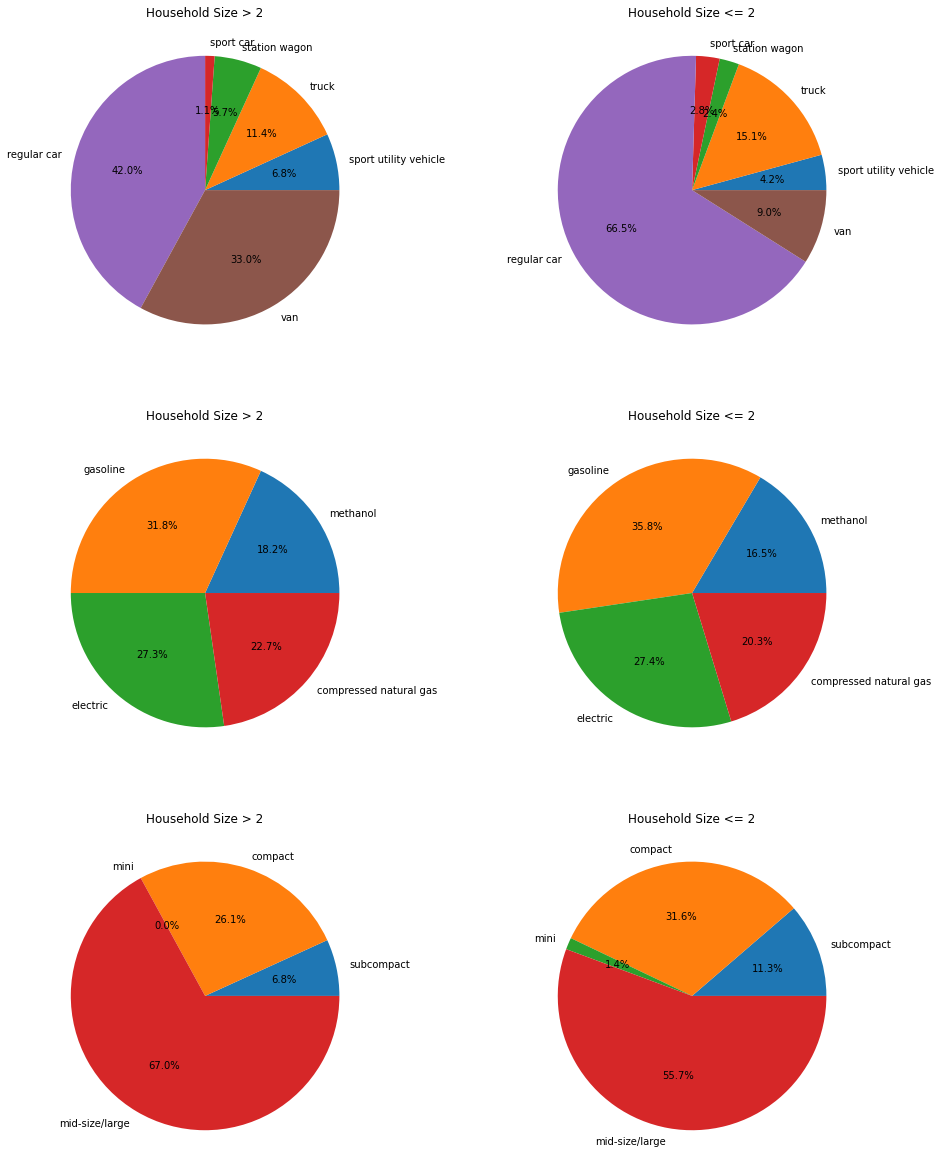

In [ ]:
#Plot the distributions of car features for the household size > 2 attribute
charFeatPie("Household Size > 2", 0.88, 2.12, "Household Size > 2", "Household Size <= 2")

###Summary
1. The proportion of people with large household sizes that prefer regular cars is significantly lower than that of those with small household sizes whereas the proportion of people with large household sizes that prefer vans is significantly higher than that of those with small household sizes.
2. The proportion of people with large household sizes that prefer gasoline is slightly lower than that of those with small household sizes.
3. The proportion of people with large household sizes that prefer mid-size/large cars is significantly higher than that of those with small household sizes whereas the proportion of people with large household sizes that prefer compact cars and subcompact cars is significantly lower than that of those with small household sizes.
<br /><br />
####Note
The differences are, in general, higher and more significant for the household size attribute than the college education attribute.

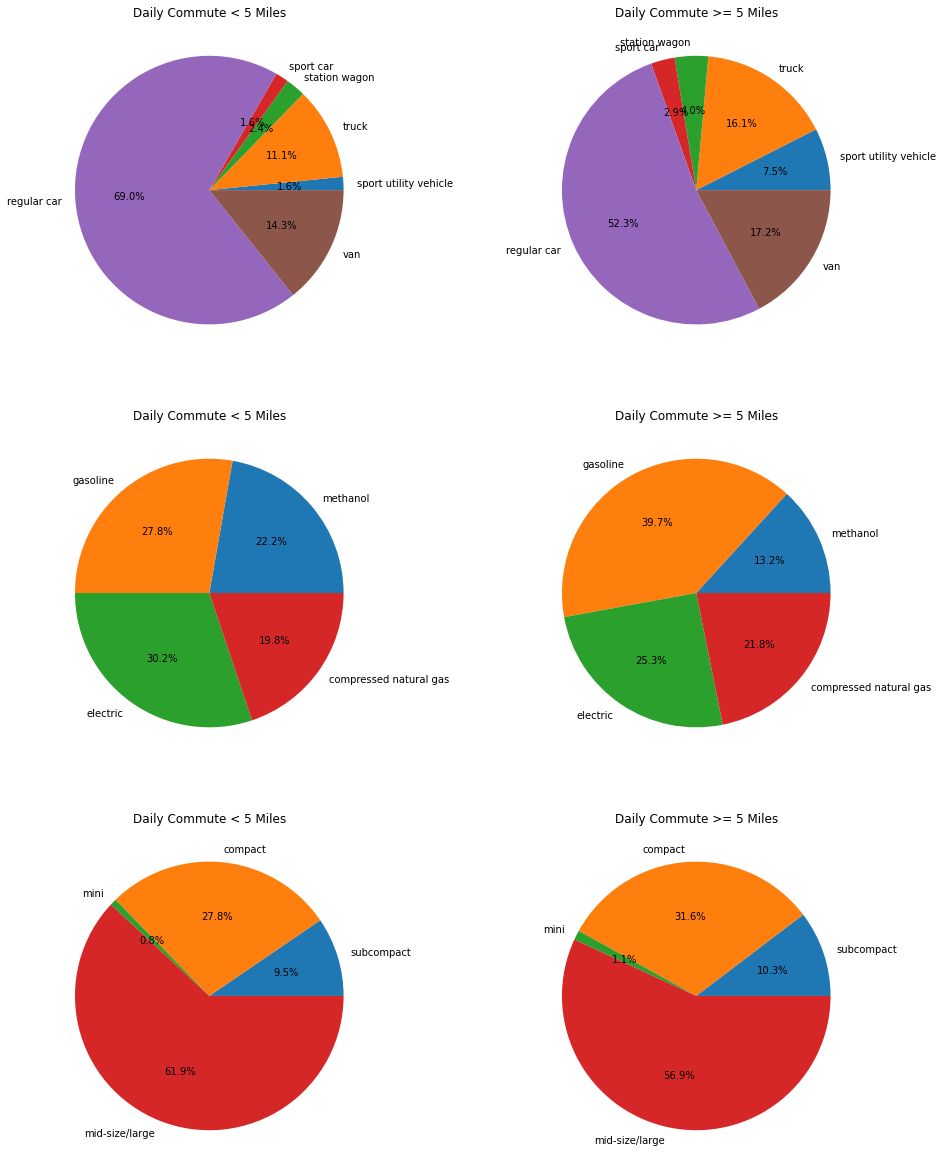

In [ ]:
#Plot the distributions of car features for the daily commute < 5 miles attribute
charFeatPie("Daily Commute < 5 Miles", 1.26, 1.74, "Daily Commute < 5 Miles", "Daily Commute >= 5 Miles")

###Summary
1. The proportion of people with long daily commutes that prefer regular cars is significantly lower than that of those with short daily commutes whereas the proportion of people with long daily commutes that prefer other cars such as vans and trucks is significantly higher than that of those with short daily commutes.
2. The proportion of people with long daily commutes that prefer methanol and electric is significantly lower than that of those with short daily commutes whereas the proportion of people with long daily commutes that prefer gasoline and cng is significantly higher than that of those with short daily commutes.
3. The proportion of people with long daily commutes that prefer mid-sized/large cars is slightly lower than that of those with short daily commutes.

In [ ]:
#Function to plot the box and whisker plots for distributions of quantitative car features given a certain user attribute
def charFeatBox(mainCol, yTitle, nTitle):

  yesNums, noNums, featList, printList = [], [], ["Price", "Speed", "Pollution"], []

  #Slices of original data frame for two conditions: user attribute is true and user attribute is false
  yesSlice = pref.loc[pref[mainCol] == "Y"]
  noSlice = pref.loc[pref[mainCol] == "N"]

  #Add all quantitative features' values for the given attribute
  for i in range(3):
    yesNums.append(list(yesSlice[featList[i]]))
    noNums.append(list(noSlice[featList[i]]))


  #Configure the figure
  plt.rcParams["figure.figsize"] = (16, 21)

  #Plot all box and whisker plots and add the five number summaries for each plot to the printList
  count = 1
  for j in range(3):
    for k in range(2):
      plt.subplot(320 + count)
      plt.title([yTitle, nTitle][k])
      plt.xlabel(featList[j])
      plt.boxplot([yesNums, noNums][k][j], vert = False)
      printList.append([yTitle, nTitle][k] + " | " + featList[j] + " - " + str(np.percentile([yesNums, noNums][k][j], [0, 25, 50, 75, 100])))
      count += 1

  plt.show()


  #Print all five number summaries
  print("\n\n\nFive Number Summaries (min, q1, median, q3, max | outliers are marked by circles):")
  for a in range(len(printList)):
    print("\n" + printList[a])

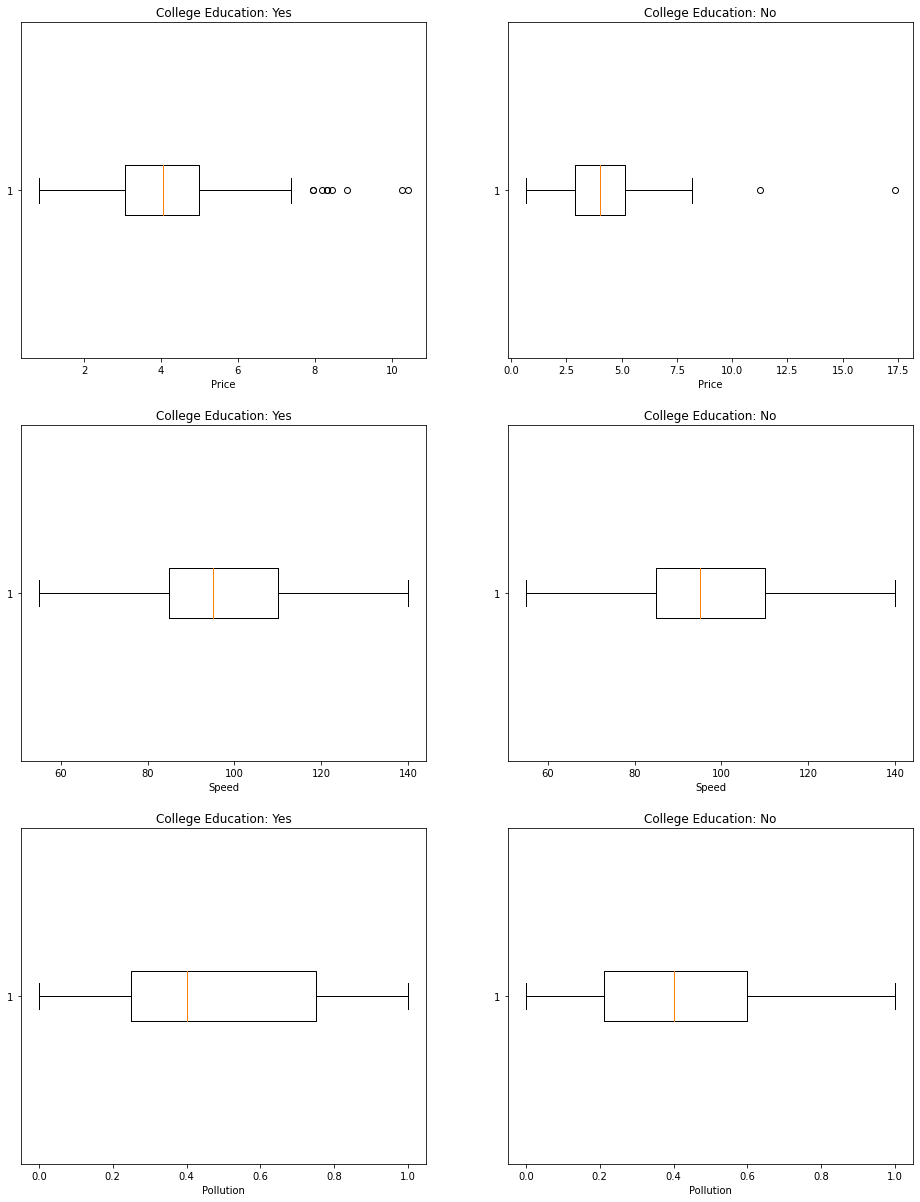




Five Number Summaries (min, q1, median, q3, max | outliers are marked by circles):

College Education: Yes | Price - [ 0.8277367   3.0593586   4.0395745   4.98654982 10.422338  ]

College Education: No | Price - [ 0.67089498  2.8906233   4.00499445  5.1388859  17.370563  ]

College Education: Yes | Speed - [ 55.  85.  95. 110. 140.]

College Education: No | Speed - [ 55.  85.  95. 110. 140.]

College Education: Yes | Pollution - [0.   0.25 0.4  0.75 1.  ]

College Education: No | Pollution - [0.     0.2125 0.4    0.6    1.    ]


In [ ]:
#Plot the distributions of car features for the college education attribute
charFeatBox("College Education", "College Education: Yes", "College Education: No")

###Summary
1. Excluding the outliers (which are more for the distribution of college graduates), both distributions are very similar.
2. Both distributions of speed are pretty much identical and there is no clear relationship/pattern.
3. In general, the distribution of pollution values for those without a college education seems to be slightly less varied and also slightly lower than that of those with a college education.

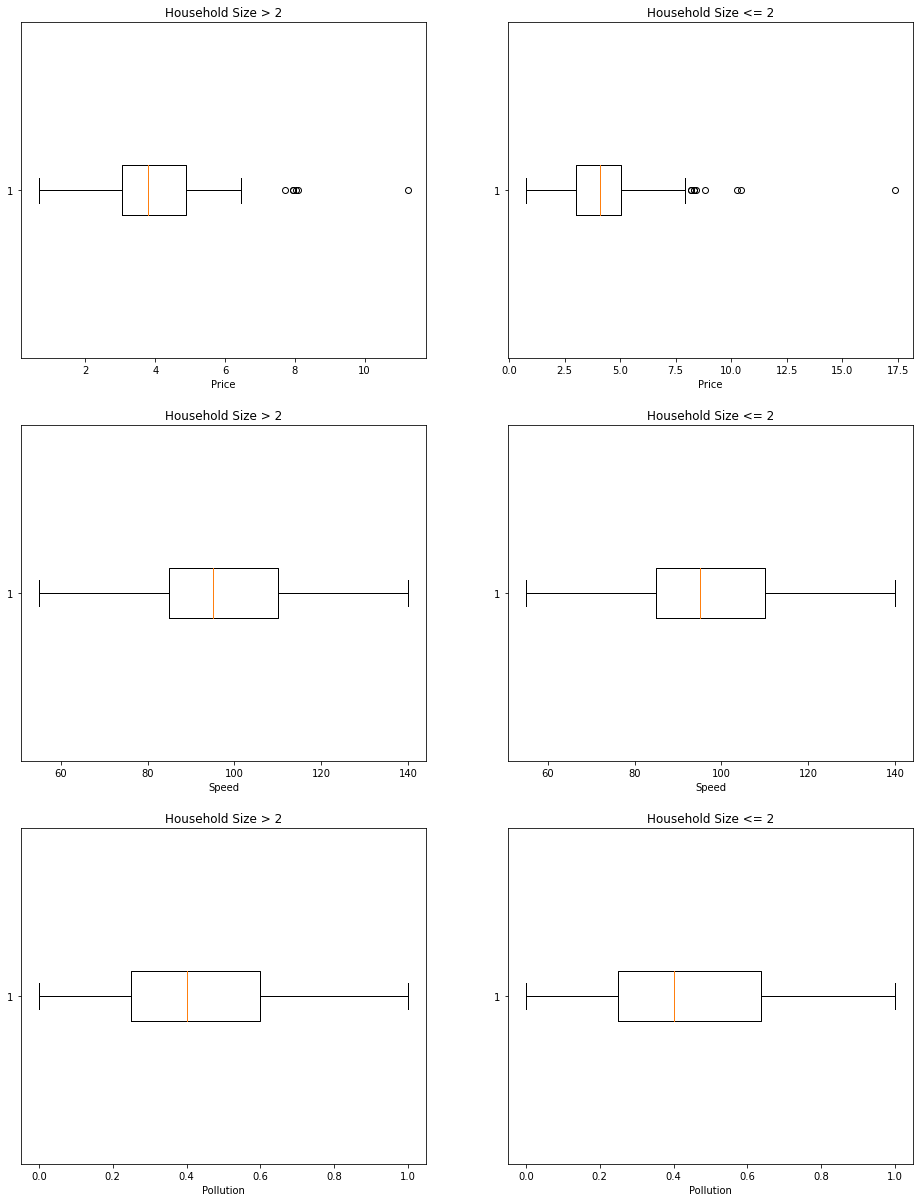




Five Number Summaries (min, q1, median, q3, max | outliers are marked by circles):

Household Size > 2 | Price - [ 0.67089498  3.0350346   3.8017382   4.88337115 11.241313  ]

Household Size <= 2 | Price - [ 0.76686666  3.0350346   4.0899555   5.02676195 17.370563  ]

Household Size > 2 | Speed - [ 55.  85.  95. 110. 140.]

Household Size <= 2 | Speed - [ 55.  85.  95. 110. 140.]

Household Size > 2 | Pollution - [0.   0.25 0.4  0.6  1.  ]

Household Size <= 2 | Pollution - [0.     0.25   0.4    0.6375 1.    ]


In [ ]:
#Plot the distributions of car features for the household size > 2 attribute
charFeatBox("Household Size > 2", "Household Size > 2", "Household Size <= 2")

###Summary
1. In general, the distribution of prices seems to be slightly higher for the respondents with a small household size than that of those with large houshold sizes, especially the first three quartiles of the data. Excluding the outliers, both distributions are still quite similar.
2. Both distributions of speed are pretty much identical and there is no clear relationship/pattern.
3. Both distributions of pollution are close to identical and there is no clear relationship/pattern.

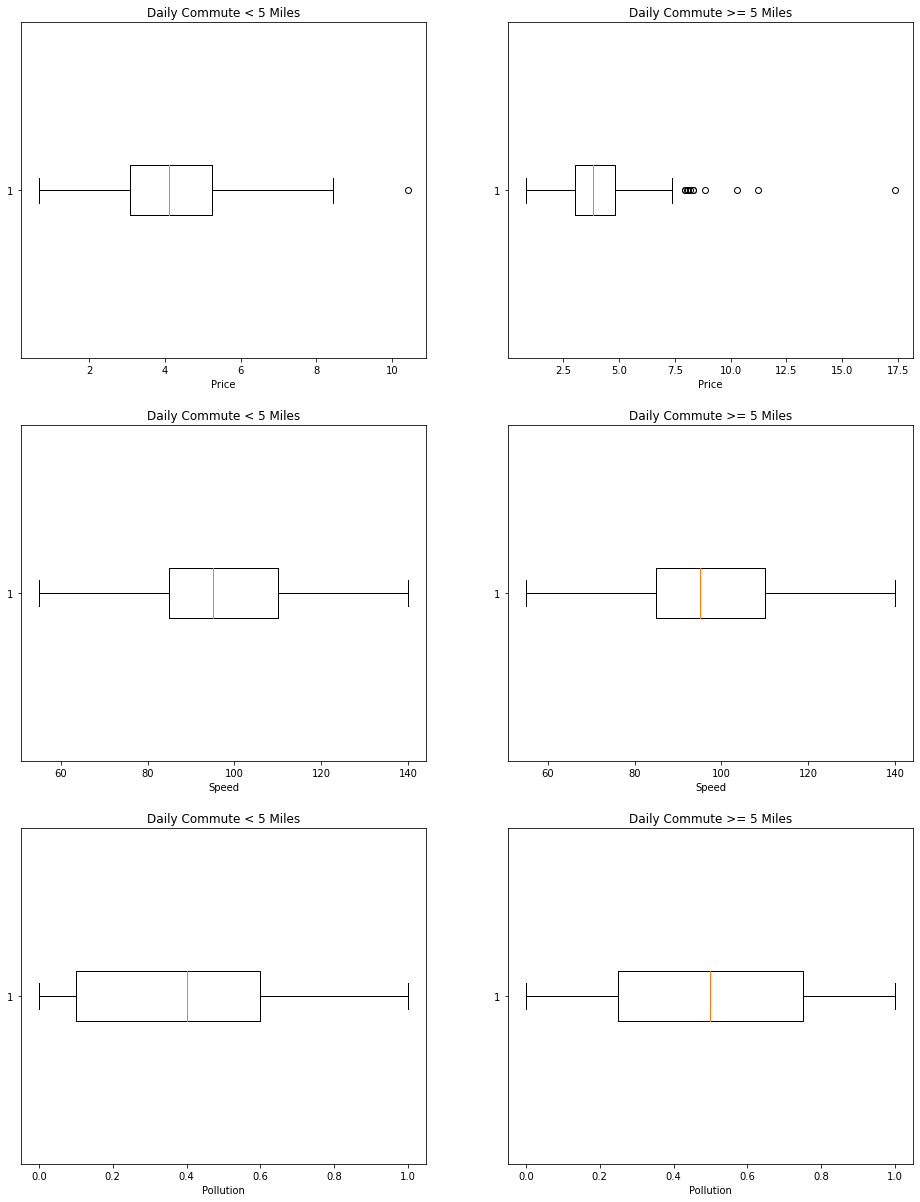




Five Number Summaries (min, q1, median, q3, max | outliers are marked by circles):

Daily Commute < 5 Miles | Price - [ 0.67089498  3.07218152  4.1143195   5.2423324  10.422338  ]

Daily Commute >= 5 Miles | Price - [ 0.8277367   3.00398295  3.8343333   4.8177056  17.370563  ]

Daily Commute < 5 Miles | Speed - [ 55.  85.  95. 110. 140.]

Daily Commute >= 5 Miles | Speed - [ 55.  85.  95. 110. 140.]

Daily Commute < 5 Miles | Pollution - [0.  0.1 0.4 0.6 1. ]

Daily Commute >= 5 Miles | Pollution - [0.   0.25 0.5  0.75 1.  ]


In [ ]:
#Plot the distributions of car features for the daily commute < 5 miles attribute
charFeatBox("Daily Commute < 5 Miles", "Daily Commute < 5 Miles", "Daily Commute >= 5 Miles")

###Summary
1. The distribution of prices for the respondents with long daily commutes has significantly more outliers than that of those with short daily commutes. In addition to this, the distribution of prices for the respondents with long daily commutes (excluding outliers) is also less varied and less spread out than that of those with short daily commutes (excluding outliers).
2. Both distributions of speed are pretty much identical and there is no clear relationship/pattern.
3. The distribution of pollution values for those with long daily commutes is, in general, higher and more uniform than that of those with short daily commutes.